## Nearest Centroid Classifier (Clasificador Euclideano)

Es un algoritmo de aprendizaje supervisado. Este algoritmo consiste en **"condensar"** la información del conjunto de entrenamiento en **centroides (centros de nubes de puntos)** para hacer predicciones a nuevos patrones, **asignando cada nuevo patron al centroide más cercano**. 

**Un centroide es el centro geométrico de un conjunto de datos, éste algoritmo utiliza la media para calcular el centro geométrico. En múltiples dimensiones, este sería el valor medio a lo largo de cada dimensión, formando un punto de centro de la distribución a través de cada variable.**

El algoritmo asume que los centroides en el espacio de características (atributos) de entrada son diferentes para cada etiqueta de destino, es decir, que **no existen dos o más centroides iguales para una etiqueta**.

**Los centroides "representan" el modelo. Dados nuevos patrones se calcula la distancia entre cada patron y cada centroide y se usa el centroide más cercano para hacer la predicción.**

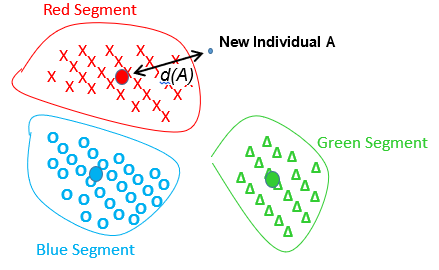

_**Documentacion:** https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html_

In [1]:
import numpy as np
import pandas as pd

import matplotlib # Para ver la versión
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn # Para ver la versión

from sklearn import datasets

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

In [2]:
# Versiones

print(f"numpy=={np.__version__}")
print(f"pandas=={pd.__version__}")
print(f"matplotlib=={matplotlib.__version__}")
print(f"seaborn=={sns.__version__}")
print(f"scikit-learn=={sklearn.__version__}")

numpy==2.0.2
pandas==2.2.3
matplotlib==3.10.0
seaborn==0.13.2
scikit-learn==1.6.1


In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

### Train, Test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")

X_train: (105, 4), y_train: (105,)
X_test: (45, 4),  y_test: (45,)


### Procesamiento

In [5]:
# Normalización de datos

x_scaler = MinMaxScaler()
X_train = x_scaler.fit_transform(X_train)
X_test = x_scaler.transform(X_test)

In [6]:
from collections import Counter

Counter(y)

Counter({np.int64(0): 50, np.int64(1): 50, np.int64(2): 50})

In [7]:
Counter(y_train)

Counter({np.int64(1): 35, np.int64(0): 35, np.int64(2): 35})

In [8]:
Counter(y_test)

Counter({np.int64(2): 15, np.int64(1): 15, np.int64(0): 15})

### Modelo

In [9]:
from sklearn.neighbors import NearestCentroid

In [10]:
# NearestCentroid

model = NearestCentroid(metric = "euclidean")

model.fit(X_train, y_train)

NearestCentroid()

### Predicciones

In [11]:
yhat = model.predict(X_test)

yhat

array([2, 1, 1, 1, 2, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 0,
       1, 2, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 2, 0, 0, 0, 0, 2, 1, 0, 1, 2,
       1])

### Métricas

In [12]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [13]:
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Accuracy:"     , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))

Jaccard Index: 0.8081140350877193
Accuracy: 0.8888888888888888
Precisión: 0.898148148148148
Sensibilidad: 0.8888888888888888
F1-score: 0.8877665544332212


### Confusion Matrix

In [14]:
confusion_matrix(y_test, yhat, labels = [0, 1, 2])

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  4, 11]])

### Classification Report

In [15]:
print(classification_report(y_test, yhat, digits = 3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        15
           1      0.778     0.933     0.848        15
           2      0.917     0.733     0.815        15

    accuracy                          0.889        45
   macro avg      0.898     0.889     0.888        45
weighted avg      0.898     0.889     0.888        45



### Atributos del Modelo

In [16]:
# .centroids_ retorna un array con los centroides del modelo, uno por cada clase. 

model.centroids_

array([[0.19126984, 0.59404762, 0.06650246, 0.05833333],
       [0.45793651, 0.3047619 , 0.5408867 , 0.50357143],
       [0.66190476, 0.4202381 , 0.78128079, 0.8202381 ]])

In [17]:
# centroides en escala original

centroids = x_scaler.inverse_transform(model.centroids_)
centroids

array([[4.98857143, 3.42571429, 1.48571429, 0.24      ],
       [5.94857143, 2.73142857, 4.23714286, 1.30857143],
       [6.68285714, 3.00857143, 5.63142857, 2.06857143]])

In [18]:
# df = pd.DataFrame(X_train)

# df["Clase"] = y_train

# df.groupby("Clase").mean()

In [19]:
# .classes_ retorna las etiquetas de la variable objetivo

model.classes_

array([0, 1, 2])

In [20]:
# .n_features_in_ retorna el número de atributos (columnas) de los centroides

model.n_features_in_

4

### Centroides y nubes de puntos

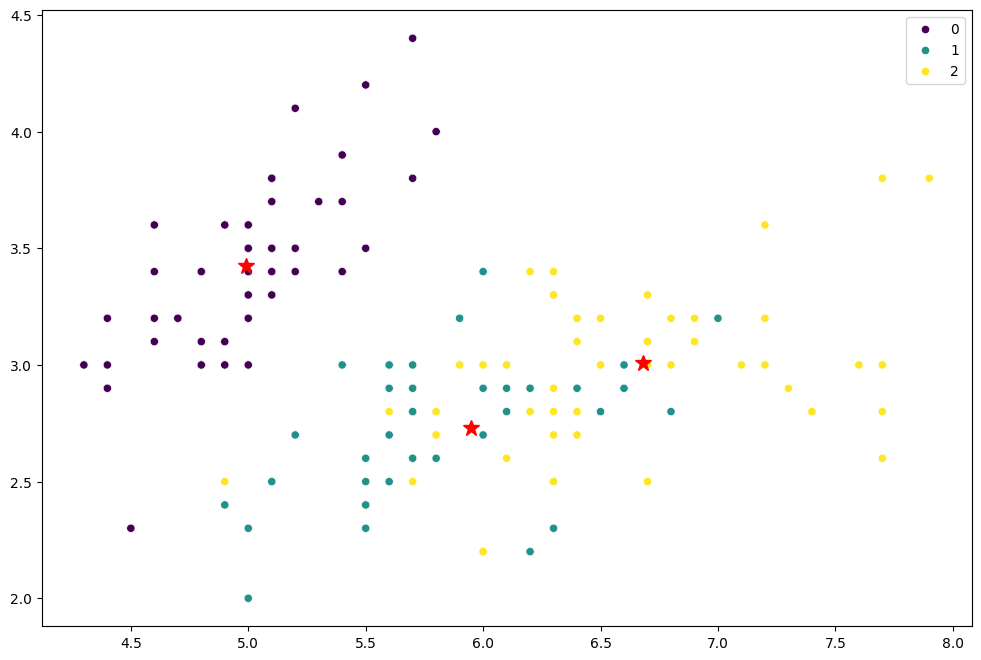

In [21]:
a, b = 0, 1

plt.figure(figsize = (12, 8))

sns.scatterplot(x = X[:, a], y = X[:, b], hue = y, palette = "viridis")

plt.plot(centroids[0][a], centroids[0][b], marker = "*", markersize = 12, color = "red")
plt.plot(centroids[1][a], centroids[1][b], marker = "*", markersize = 12, color = "red")
plt.plot(centroids[2][a], centroids[2][b], marker = "*", markersize = 12, color = "red")

plt.show()

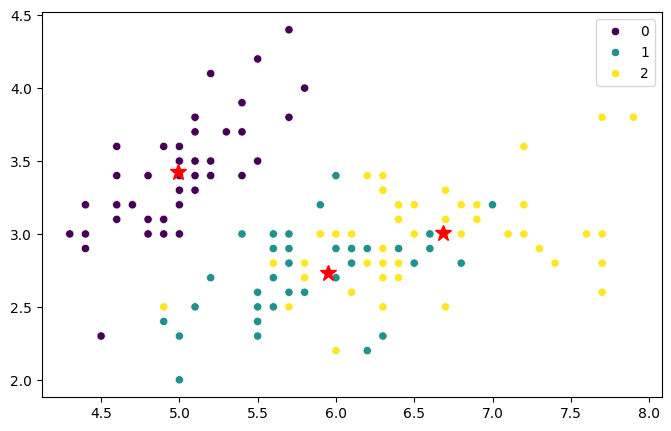

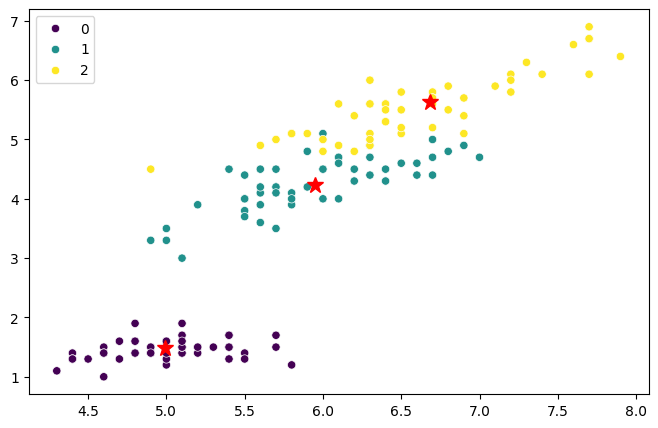

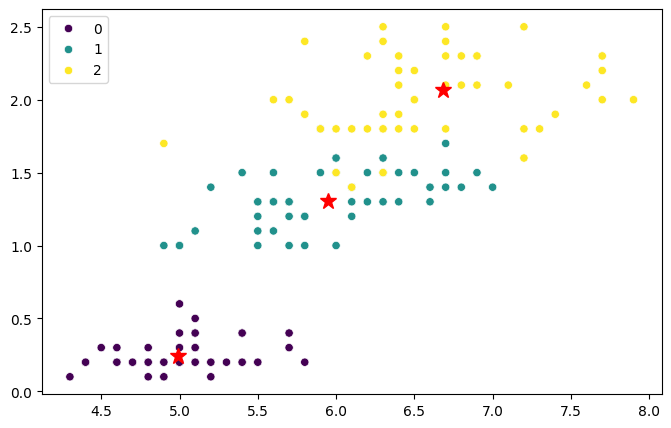

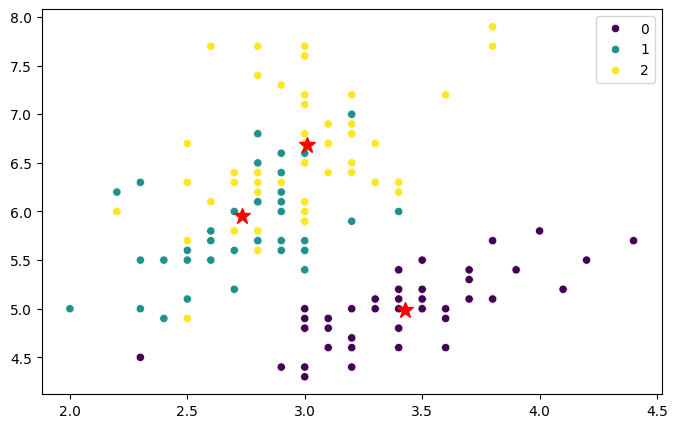

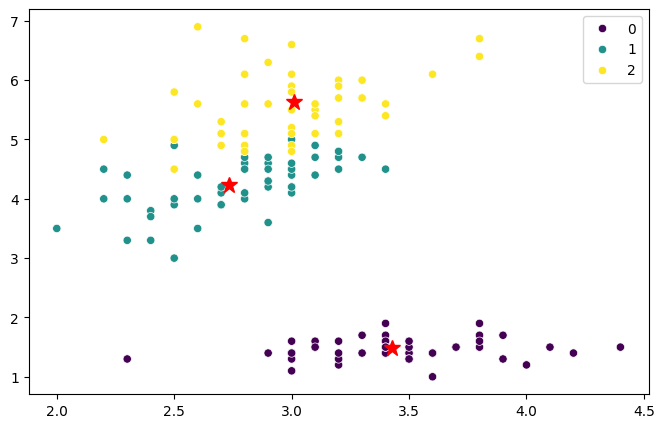

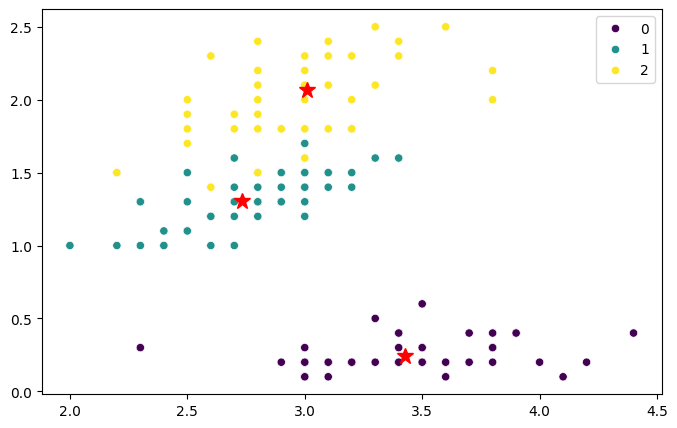

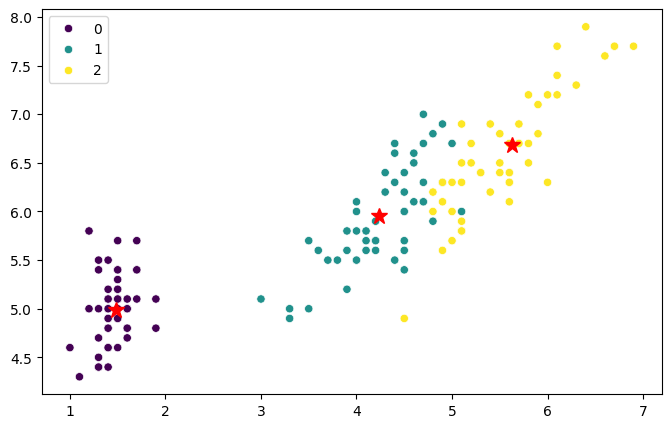

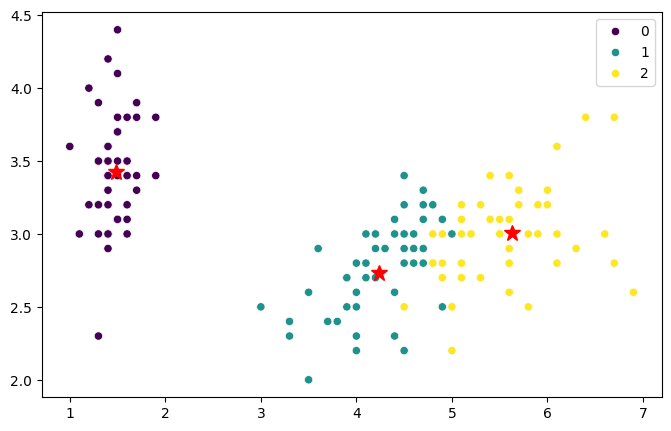

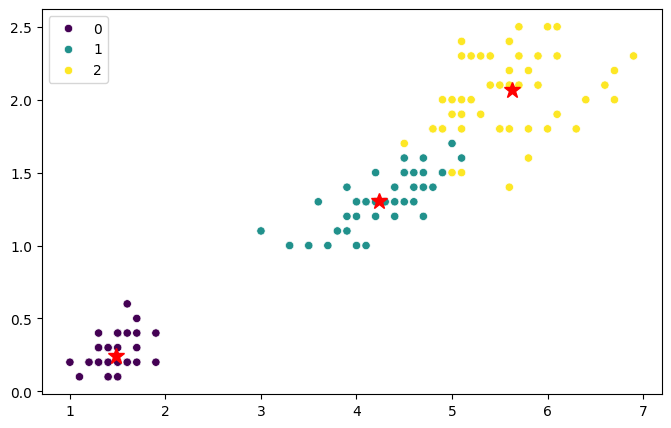

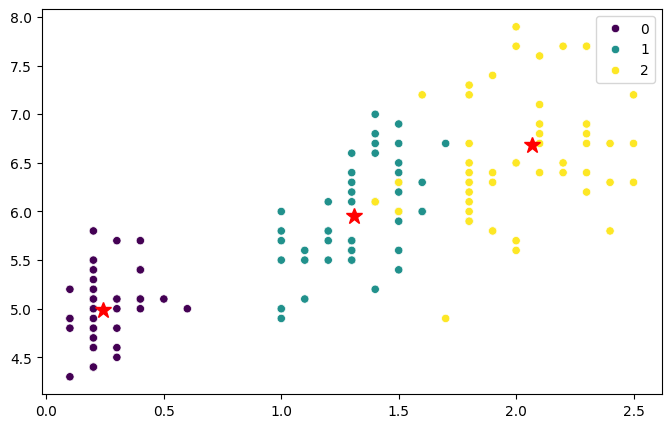

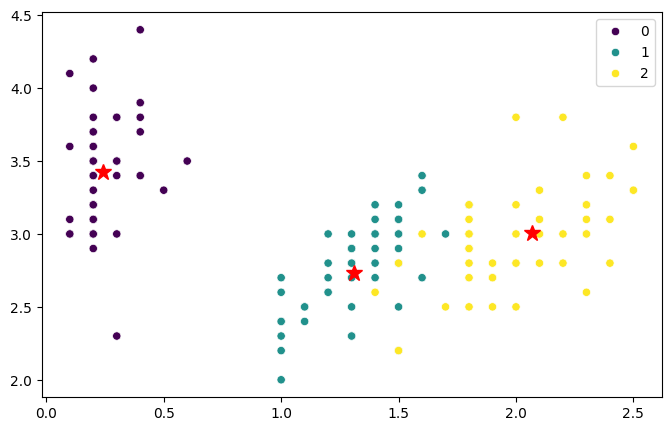

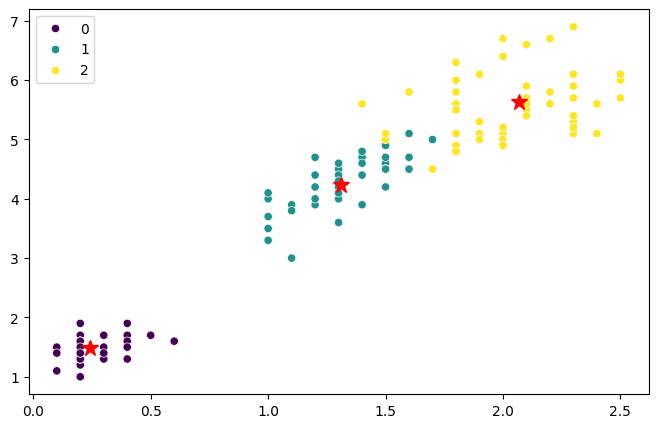

In [22]:
for i in range(4):
    for j in range(4):
        if i != j:

            plt.figure(figsize = (8, 5))

            sns.scatterplot(x = X[:, i], y = X[:, j], hue = y, palette = "viridis")

            plt.plot(centroids[0][i], centroids[0][j], marker = "*", markersize = 12, color = "red")
            plt.plot(centroids[1][i], centroids[1][j], marker = "*", markersize = 12, color = "red")
            plt.plot(centroids[2][i], centroids[2][j], marker = "*", markersize = 12, color = "red")

            plt.show()

In [23]:
################################################################################################################################

### Ejercicio 1: 
- Utiliza el dataset del titanic para practicar **`NearestCentroid`**:

In [24]:
# Datos

df = pd.read_csv(filepath_or_buffer = "../Data/titanic_preprocesamiento.csv")

X = df.drop(["Survived"], axis = 1)
y = df["Survived"]

# Train, Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# MinMaxScaler
x_scaler = MinMaxScaler()
X_train = x_scaler.fit_transform(X_train)
X_test = x_scaler.transform(X_test)

print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (700, 11), X_test: (176, 11)
y_train: (700,), y_test: (176,)


In [25]:
# NearestCentroid

model = NearestCentroid()

model.fit(X_train, y_train)

yhat_model = model.predict(X_test)

accuracy_model = accuracy_score(y_test, yhat_model)

print(accuracy_model)

0.7556818181818182


### Ejercicio 2:
- Intenta recrear el algormito de **`NearestCentroid`**:
1. Sea **`x`** un patron de prueba a clasificar.
2. Se calculan los **`n-centroides`** (uno para cada clase).
3. Se calcula la distancia entre los **`n-centroides`** y el patron.
5. Asigna la clase del centroide más cercano al nuevo patron.
6. Repite el algoritmo con otra formula de distancia.

In [26]:
def distancia_euclideana(p1, p2):
    return np.sqrt(sum([(x - y)**2 for x, y in zip(p1, p2)]))

def distancia_manhattan(p1, p2):
    return sum([abs(x - y) for x, y in zip(p1, p2)])

def distancia_minkowski(p1, p2, p=3):
    return np.sum([abs(x - y)**p for x, y in zip(p1, p2)])**(1/p)

def distancia_chebyshev(p1, p2):
    return max([abs(x - y) for x, y in zip(p1, p2)])

In [27]:
class NCentroid:
    
    def __init__(self, distancia):
        self.distancia = distancia
        
        self.target = None
        self.centroids = None
        
    def fit(self, X, y):
        self.target = y.name
        df = pd.concat([pd.DataFrame(X), pd.DataFrame(y).reset_index(drop=True)], axis=1)
        self.centroids = df.groupby(self.target, as_index = False).mean()
        
    def predict(self, X):
        self.centroids["dist"] = [self.distancia(X, x) for x in self.centroids.iloc[:, 1:].values]
        return self.centroids.sort_values("dist").head(1)[self.target].values[0]

In [28]:
nueva_instancia = [26, 3, 2, 2, 1, 1, 0, 2.83907846, 0, 0, 1]

print(nueva_instancia)

[26, 3, 2, 2, 1, 1, 0, 2.83907846, 0, 0, 1]


In [29]:
model = NCentroid(distancia = distancia_euclideana)

model.fit(X_train, y_train)

model.predict(nueva_instancia)

np.float64(0.0)

In [30]:
model = NCentroid(distancia = distancia_manhattan)

model.fit(X_train, y_train)

model.predict(nueva_instancia)

np.float64(1.0)

In [31]:
model = NCentroid(distancia = distancia_minkowski)

model.fit(X_train, y_train)

model.predict(nueva_instancia)

np.float64(0.0)

In [32]:
model = NCentroid(distancia = distancia_chebyshev)

model.fit(X_train, y_train)

model.predict(nueva_instancia)

np.float64(0.0)

In [33]:
###########################################################################################################################